# Задание 1

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%config InLineBackend.fuger_format = 'svg'
%matplotlib inline

In [4]:
from sklearn.datasets import load_boston

In [5]:
data = load_boston()

In [7]:
data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [8]:
X = pd.DataFrame(data['data'], columns=data['feature_names'])

In [9]:
X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [10]:
y = pd.DataFrame(data['target'], columns=['price'])

In [11]:
y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [12]:
from sklearn.model_selection import train_test_split

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
scaler = StandardScaler()

In [30]:
X_train_scaled = scaler.fit_transform(X_train)

In [31]:
X_test_scaled = scaler.transform(X_test)

In [33]:
from sklearn.manifold import TSNE

In [134]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

In [135]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=data['feature_names'])
X_test_scaled = pd.DataFrame(X_test_scaled, columns=data['feature_names'])

In [136]:
X_train_tsne = tsne.fit_transform(X_train_scaled)

In [38]:
X_train_tsne.shape

(404, 2)

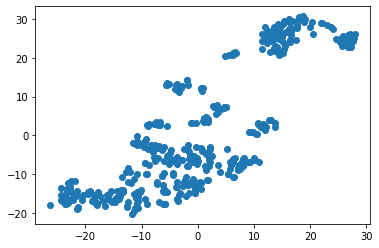

In [39]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

# Задание 2

In [40]:
from sklearn.cluster import KMeans

In [107]:
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)

In [108]:
label_trains = kmeans.fit_predict(X_train_scaled)

In [109]:
pd.value_counts(label_trains)

2    191
1    127
0     86
dtype: int64

Text(15, 16, 'Cluster 3')

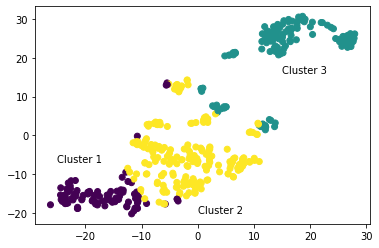

In [110]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=label_trains)
plt.text(-25, -7, 'Cluster 1')
plt.text(0, -20, 'Cluster 2')
plt.text(15, 16, 'Cluster 3')

In [111]:
df = pd.concat([X_train.CRIM, pd.DataFrame(label_trains, columns=['label']), y_train], axis=0, ignore_index=False)
df.head()

,0,label,price
477,15.02340,NaN,NaN
15,0.62739,NaN,NaN
332,0.03466,NaN,NaN
423,7.05042,NaN,NaN
19,0.72580,NaN,NaN


In [112]:
X_train_label = X_train.copy()
X_train_label['label'] = label_trains
X_train_label.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,label
477,15.02340,0.0,18.10,0.0,0.6140,5.304,97.3,2.1007,24.0,666.0,20.2,349.48,24.91,1
15,0.62739,0.0,8.14,0.0,0.5380,5.834,56.5,4.4986,4.0,307.0,21.0,395.62,8.47,2
332,0.03466,35.0,6.06,0.0,0.4379,6.031,23.3,6.6407,1.0,304.0,16.9,362.25,7.83,0
423,7.05042,0.0,18.10,0.0,0.6140,6.103,85.1,2.0218,24.0,666.0,20.2,2.52,23.29,1
19,0.72580,0.0,8.14,0.0,0.5380,5.727,69.5,3.7965,4.0,307.0,21.0,390.95,11.28,2


In [113]:
y_train_label = y_train.copy()
y_train_label['label'] = label_trains
y_train_label.head()

,price,label
477,12.0,1
15,19.9,2
332,19.4,0
423,13.4,1
19,18.2,2


In [114]:
X_train_label[['CRIM', 'label']].groupby('label').mean()

,CRIM
label,
0,0.073566
1,10.797028
2,0.421660


In [115]:
y_train_label.groupby('label').mean()

,price
label,
0,27.788372
1,16.165354
2,24.958115


# Задание 3

In [124]:
label_tests = kmeans.predict(X_test_scaled)

In [126]:
pd.value_counts(label_tests)

2    51
1    35
0    16
dtype: int64

In [127]:
X_test_label = X_test.copy()
X_test_label['label'] = label_tests
X_test_label.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,label
173,0.09178,0.0,4.05,0.0,0.510,6.416,84.1,2.6463,5.0,296.0,16.6,395.50,9.04,2
274,0.05644,40.0,6.41,1.0,0.447,6.758,32.9,4.0776,4.0,254.0,17.6,396.90,3.53,0
491,0.10574,0.0,27.74,0.0,0.609,5.983,98.8,1.8681,4.0,711.0,20.1,390.11,18.07,1
72,0.09164,0.0,10.81,0.0,0.413,6.065,7.8,5.2873,4.0,305.0,19.2,390.91,5.52,2
452,5.09017,0.0,18.10,0.0,0.713,6.297,91.8,2.3682,24.0,666.0,20.2,385.09,17.27,1


In [128]:
y_test_label = y_test.copy()
y_test_label['label'] = label_tests
y_test_label.head()

,price,label
173,23.6,2
274,32.4,0
491,13.6,1
72,22.8,2
452,16.1,1


In [129]:
X_test_label[['CRIM', 'label']].groupby('label').mean()

,CRIM
label,
0,0.062060
1,10.165531
2,0.266079


In [130]:
y_test_label.groupby('label').mean()

,price
label,
0,31.350000
1,16.437143
2,21.860784
